Setup and Import Libraries

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

Load/Create Data

In [26]:
dataset = [
    ['Milk', 'Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Jam', 'Milk'],
    ['Bread', 'Jam'],
    ['Milk', 'Jam', 'Bread'],
    ['Milk', 'Butter'],
    ['Butter', 'Bread']
]


In [27]:
dataset

[['Milk', 'Bread'],
 ['Milk', 'Bread', 'Butter'],
 ['Bread', 'Butter'],
 ['Milk', 'Bread', 'Butter'],
 ['Milk', 'Bread'],
 ['Jam', 'Milk'],
 ['Bread', 'Jam'],
 ['Milk', 'Jam', 'Bread'],
 ['Milk', 'Butter'],
 ['Butter', 'Bread']]

Transaction Encoding

In [28]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()


,Bread,Butter,Jam,Milk
0,True,False,False,True
1,True,True,False,True
2,True,True,False,False
3,True,True,False,True
4,True,False,False,True


Generate Frequent Itemsets

In [29]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)


,support,itemsets
0,0.8,(Bread)
3,0.7,(Milk)
1,0.5,(Butter)
5,0.5,"(Bread, Milk)"
4,0.4,"(Bread, Butter)"
2,0.3,(Jam)
6,0.3,"(Milk, Butter)"


Generate Association Rules

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(Bread),(Butter),0.4,0.5,1.0
1,(Butter),(Bread),0.4,0.8,1.0


Visualization

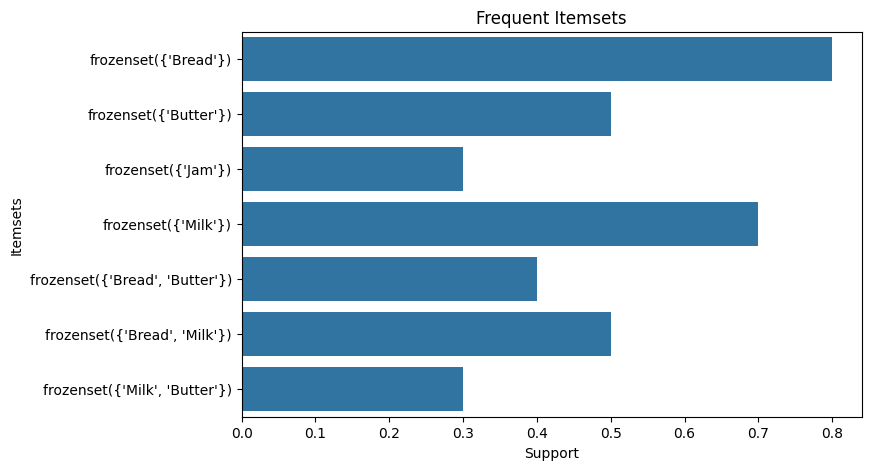

In [31]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
plt.figure(figsize=(8,5))
sns.barplot(x=frequent_itemsets.support, y=frequent_itemsets.itemsets)
plt.title('Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


Scatter plot: Support vs Confidence

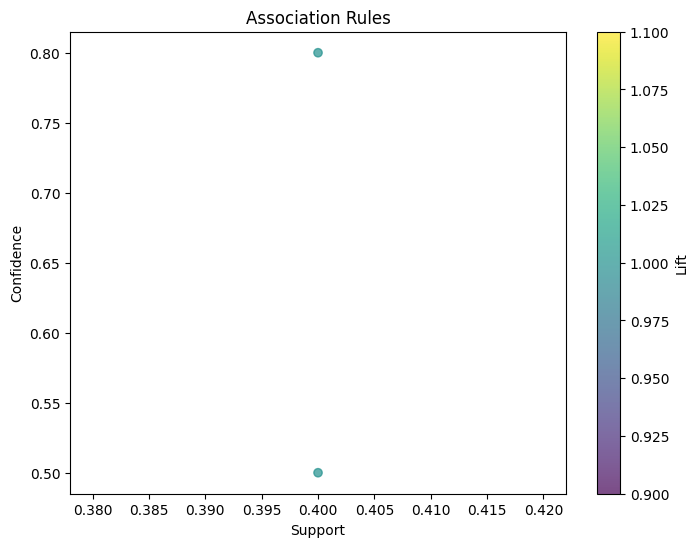

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()


Interpretation of Results

Support: How often items appear together.

Confidence: How often consequent is bought given antecedent.

Lift: If >1, means consequent is more likely to be bought with antecedent.

Example insight:

Customers who buy Milk & Bread have a 60% chance of also buying Butter, which is 1.2 times more likely than random.